# M4101, IUT Bordeaux, Réseaux de neurones simples

In [1]:
import numpy as np
import math

# Exercice 1. 

Un petit réseau de neurones à la main. Ecrire le code pour implémenter le réseau à 6 neurones vu dans les transparents. On n'implémente pas l'apprentissage, mais la prédiction à partir d'une entrée donnée.

In [2]:
EX1_biais = [1,0,0,0,-2,2]
EX1_poids = [1,-2,-1,1,2,-1,-2,-1,3,-1,-1,4]

def EX1_sigmoid(z):
    return(1.0/(1.0+math.exp(-z)))

def EX1_neurone2poids(i):
    return([EX1_poids[2*i],EX1_poids[2*i+1]])

def EX1_neurone(i,in1,in2):
    w_poids       = EX1_neurone2poids(i)
    z_aggregation = in1*w_poids[0] + in2*w_poids[1] + EX1_biais[i]
    y_activation  = EX1_sigmoid(z_aggregation)
    return(y_activation)
    
def EX1_reseau(in1,in2):
    res0 = EX1_neurone(0,in1,in2)
    res1 = EX1_neurone(1,in1,in2)
    res2 = EX1_neurone(2,res0,res1)
    res3 = EX1_neurone(3,res0,res1)
    res4 = EX1_neurone(4,res2,res3)
    res5 = EX1_neurone(5,res2,res3)
    return([res4,res5])

In [3]:
EX1_reseau(1,-1)

[0.6177047777553412, 0.8291239841574399]

In [4]:
EX1_reseau(0,0)

[0.5118473769870672, 0.8543839009877142]

## Exercice 2. perceptron

Ecrire des perceptrons (1 neurone) implémentant AND, OR, NOT.

https://medium.com/@stanleydukor/neural-representation-of-and-or-not-xor-and-xnor-logic-gates-EX2_perceptron-algorithm-b0275375fea1

In [5]:
def EX2_perceptron_AND(val1, val2):
  poids1 = 2
  poids2 = 1
  biais = -3
  seuil = 0
  somme = poids1 * val1 + poids2 * val2 + biais
  if somme >= seuil:
    return(1)
  else:
    return(0)

In [6]:
print("EX2_perceptron_AND(0,0) : ", EX2_perceptron_AND(0,0))
print("EX2_perceptron_AND(1,0) : ", EX2_perceptron_AND(1,0))
print("EX2_perceptron_AND(0,1) : ", EX2_perceptron_AND(0,1))
print("EX2_perceptron_AND(1,1) : ", EX2_perceptron_AND(1,1))

EX2_perceptron_AND(0,0) :  0
EX2_perceptron_AND(1,0) :  0
EX2_perceptron_AND(0,1) :  0
EX2_perceptron_AND(1,1) :  1


In [7]:
def EX2_perceptron_OR(val1, val2):
  poids1 = 1
  poids2 = 1
  biais = -1
  seuil = 0
  somme = poids1 * val1 + poids2 * val2 + biais
  if somme >= seuil:
    return(1)
  else:
    return(0)

In [8]:
print("EX2_perceptron_OR(0,0) : ", EX2_perceptron_OR(0,0))
print("EX2_perceptron_OR(1,0) : ", EX2_perceptron_OR(1,0))
print("EX2_perceptron_OR(0,1) : ", EX2_perceptron_OR(0,1))
print("EX2_perceptron_OR(1,1) : ", EX2_perceptron_OR(1,1))

EX2_perceptron_OR(0,0) :  0
EX2_perceptron_OR(1,0) :  1
EX2_perceptron_OR(0,1) :  1
EX2_perceptron_OR(1,1) :  1


In [9]:
def EX2_perceptron_NOT(val1):
  poids1 = -1
  biais = 0.5
  seuil = 0
  somme = poids1 * val1 + biais
  if somme >= seuil:
    return(1)
  else:
    return(0)

In [10]:
print("EX2_perceptron_NOT(0) : ", EX2_perceptron_NOT(0))
print("EX2_perceptron_NOT(1) : ", EX2_perceptron_NOT(1))

EX2_perceptron_NOT(0) :  1
EX2_perceptron_NOT(1) :  0


### Exercice 3.
Ajouter une couche SoftMax au réseau de l'exercice 1.

In [11]:
def EX3_SoftMax(in1,in2):
    exp_in1 = math.exp(in1)
    exp_in2 = math.exp(in2)
    somme = exp_in1+exp_in2
    return([exp_in1/somme,exp_in2/somme])
    
def EX3_reseau(in1,in2):
    [out1,out2] = EX1_reseau(in1,in2)
    return(EX3_SoftMax(out1,out2))

In [12]:
EX3_reseau(1,-1)

[0.44734119804813083, 0.5526588019518692]

In [13]:
EX3_reseau(1,1)

[0.3846820512044451, 0.6153179487955549]

## Exercice 4.

On écrit nous-même le code pour un perceptron à un neurone apprenant une porte logique à deux entrées (AND, OR, XOR).

Laissons donc la machine les découvrir toute seule !

Pour cela nous allons initialiser les poids à 0.

Puis nous ferons une boucle de plusieurs itérations.

A chaque itération nous calculerons la somme des produits entre les poids et les valeurs. Nous utiliserons par commodité la fonction « dot » de la librairie NumPy qui permet de faire toute seule le produit scalaire (dot product).

Cette somme sera déduite du résultat attendu, pour calculer la valeur de l’erreur.

On multiplie ensuite cette erreur par les valeurs d’entrée et le taux d’apprentissage pour déterminer les nouveaux poids. C’est l’algorithme de descente de gradient, appliqué à un réseau d'un neurone, avec une fonction de perte simple. Le taux d’apprentissage permet d’ajuster à quelle vitesse on apprend. S’il est trop faible l’apprentissage sera long, s’il est trop élevé on n’arrivera pas à apprendre. Ici nous utiliserons une valeur de 1.

On recommence l’opération un certain nombre de fois.

A la fin on affiche le résultat de chaque valeur d’entrée possible pour vérifier que l’ordinateur a apprit correctement.

In [15]:
from random import choice
from pylab import plot, ylim, show

# Fonction de pré-activation
# Elle prend en entrée la valeur des poids
# Et les valeurs d'entrée des neurones (les entrée + le biais)
def pre_activation(poids, valeurs_entrees):
    # On réalise le produit scalaire (dot product)
    produit_scalaire = poids.T.dot(valeurs_entrees)
    return(produit_scalaire)

# Fonction d'activation
def fonction_d_activation(produit_scalaire):
    # On retourne 1 si le produit_scalaire est supérieur ou égal à 0, 0 sinon
    if produit_scalaire >= 0:
        return(1)
    else:
        return(0)

# La prédiction consiste à prévoir la valeur attendue en sortie en fontion
# des valeurs d'entrée et des poids
def faire_une_prediction(poids, valeurs_entrees):
    produit_scalaire = pre_activation(poids, valeurs_entrees)
    prediction       = fonction_d_activation(produit_scalaire)
    return(prediction)

def entrainement_du_model(donnees_entrainement, nombre_epoch=10, taux_apprentissage = 1):
    # Epoch : une epoch est un apprentissage sur le jeux de données complet.
    # Il en faut plusieurs pour arriver à apprendre correctement
    # Une itération est le passage sur une donnée, il y a donc plusieurs itération par Epoch.
    # Initialisation des 3 valeurs de poids (entrée1, entrée2 et biais)
    poids = np.zeros(3)
    # Initialisation d'un tableau pour stocker l'historique des erreurs
    historique_des_erreurs = []
    # On fixe le nombre d'itération
    #  Avec un gros jeux de données on piocherait aléatoirement des valeurs. 
    # Ici on prend tous le jeux de odonnées à chaque fois.
    nombre_iteration = len(donnees_entrainement)
    for epoch in range(nombre_epoch):
        for i in range(nombre_iteration):
            # On récupére les données d'entrées et le résultat attendue
            # dans le jeux de données d'entrainement
            valeurs_entrees, resultat_attendu = donnees_entrainement[i]
            # On réalise une prédiction :
            # c'est à dire estimer la valeur attendue en fonction des valeurs d'entrée du neurone
            prediction = faire_une_prediction(poids, valeurs_entrees)
            # On soustrait la valeur prédite à la valeur attendue
            # Ce qui nous donne l'erreur, elle est égale à 0 si la prédiction était bonne
            # Si elle est toujours à 0 c'est que l'apprentissage est terminé (pas fait automatiquement ici)
            erreur = resultat_attendu - prediction
            # On ajoute cette erreur à l'historique des erreurs
            historique_des_erreurs.append(erreur)
            # Cette erreur est multipliée par le taux d'aprentissage et les valeurs d'entrées,
            # pour estimer les poids pour la prochaine itération.
            poids = poids + taux_apprentissage * erreur * valeurs_entrees
            #print("input=", valeurs_entrees, "produit_scalaire=", produit_scalaire, " poids=",poids," resultat_attendu=", resultat_attendu, " fonction_d_activation(produit_scalaire)=", fonction_d_activation(produit_scalaire), " erreur=", erreur)
    print("Erreurs = ", historique_des_erreurs)
    # On affiche le graph de l'évolution de l'erreur
    from pylab import plot, ylim, show
    ylim([-1,1])
    plot(historique_des_erreurs)
    show()
    return(poids)

def utilisation_du_model(poids, donnees):
    # Utilisation des poids issue de l'entrainement sur les différentes valeurs
    for valeurs_entrees,_ in donnees: # "_" sert à ignorée la dernière colonne du tableau qui contient le résultat attendu.
     prediction = faire_une_prediction(poids, valeurs_entrees)
     print("{} -> {}".format(valeurs_entrees[:2], prediction))

In [16]:
# Le jeux de données avec le résultat attendu pour un OR
# [entrée1, entrée2, biais d'activation], résultat attendu
donnees_entrainement_OR = [
    (np.array([0,0,1]), 0),
    (np.array([0,1,1]), 1),
    (np.array([1,0,1]), 1),
    (np.array([1,1,1]), 1),
]

# Le jeux de données avec le résultat attendu pour un AND
donnees_entrainement_AND = [
    (np.array([0,0,1]), 0),
    (np.array([0,1,1]), 0),
    (np.array([1,0,1]), 0),
    (np.array([1,1,1]), 1),
]

# Le jeux de données avec le résultat attendu pour un XOR
donnees_entrainement_XOR = [
    (np.array([0,0,1]), 0),
    (np.array([0,1,1]), 1),
    (np.array([1,0,1]), 1),
    (np.array([1,1,1]), 0),
]

-----> La porte logique AND

Erreurs =  [-1, 0, 0, 1, -1, -1, 0, 1, 0, -1, -1, 1, 0, 0, -1, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


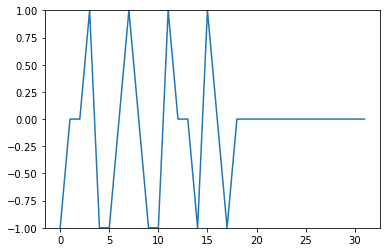

poids_calcules pour AND :  [ 2.  1. -3.]
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


In [17]:
print('-----> La porte logique AND\n')
# Choix du jeu de données AND
donnees_entrainement = donnees_entrainement_AND
# Le modèl est la structure du réseau de neurones, ici il n'y a qu'un neurone.
# L'entrainement consiste à calculer/déterminer les poids en fonction du résultat attendu. Cette étape s'appel "train" ou "fit" en anglais
poids_calcules = entrainement_du_model(donnees_entrainement, nombre_epoch=8)
print("poids_calcules pour AND : ", poids_calcules)
utilisation_du_model(poids_calcules, donnees_entrainement)

In [18]:
print('\n-----> La porte logique OR\n')
# Entrainement sur le jeux de donnée OR
donnees_entrainement = donnees_entrainement_OR
poids_calcules = entrainement_du_model(donnees_entrainement, nombre_epoch=8)
print("poids_calcules pour OR : ", poids_calcules)
utilisation_du_model(poids_calcules, donnees_entrainement)


-----> La porte logique OR

Erreurs =  [-1, 1, 0, 0, -1, 0, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


poids_calcules pour OR :  [ 1.  1. -1.]
[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 1



-----> La porte logique XOR

Erreurs =  [-1, 1, 0, -1, 0, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1]


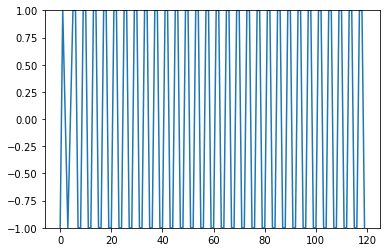

poids_calcules pour XOR :  [-1.  0.  0.]
[0 0] -> 1
[0 1] -> 1
[1 0] -> 0
[1 1] -> 0


In [21]:
print('\n-----> La porte logique XOR\n')
# Entrainement sur le jeux de donnée XOR
donnees_entrainement = donnees_entrainement_XOR
poids_calcules = entrainement_du_model(donnees_entrainement, nombre_epoch=30)
print("poids_calcules pour XOR : ", poids_calcules)
utilisation_du_model(poids_calcules, donnees_entrainement)

On s'apercoit que ca ne marche pas bien pour XOR. 

## Exercice 5

On reprend l'exercice 4, mais maintenant avec Keras. Essayons de trouver des architectures simples permettant d'apprendre ces portes logiques.

In [8]:
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'keras'

In [5]:
# On cree un modele a 1 neurone
model_GATE_1 = Sequential()
model_GATE_1.add(Dense(1, input_dim=2, kernel_initializer='uniform', activation='linear'))
model_GATE_1.compile(loss='mean_squared_error',optimizer='adam',metrics=['binary_accuracy'])

NameError: name 'Sequential' is not defined

In [24]:
# Jeux d'entrainement
X_AND = np.array([[0,0],[0,1],[1,0],[1,1]], 'float32')
y_AND = np.array([[0],[0],[0],[1]], 'float32')

X_OR = np.array([[0,0],[0,1],[1,0],[1,1]], 'float32')
y_OR = np.array([[0],[1],[1],[1]], 'float32')

X_XOR = np.array([[0,0],[0,1],[1,0],[1,1]], 'float32')
y_XOR = np.array([[0],[1],[1],[0]], 'float32')

In [25]:
# On l'utilise pour AND, OR, XOR
model_GATE_1.fit(X_AND, y_AND, batch_size=1, epochs=500, verbose=0)
print('AND\n',model_GATE_1.predict(X_AND))
model_GATE_1.fit(X_OR, y_OR, batch_size=1, epochs=500, verbose=0)
print('OR\n',model_GATE_1.predict(X_OR))
model_GATE_1.fit(X_XOR, y_XOR, batch_size=1, epochs=500, verbose=0)
print('XOR\n',model_GATE_1.predict(X_XOR))

AND
 [[-0.0695411 ]
 [ 0.28763103]
 [ 0.2729538 ]
 [ 0.63012594]]
OR
 [[0.23456529]
 [0.74717367]
 [0.7461374 ]
 [1.2587457 ]]
XOR
 [[0.29302406]
 [0.4638673 ]
 [0.46392262]
 [0.63476586]]


Commentaires?

In [26]:
# On cree un modele a 16+1 neurones
model_GATE_2 = Sequential()
model_GATE_2.add(Dense(16,  input_dim=2, kernel_initializer='uniform', activation='linear'))
model_GATE_2.add(Dense(1,  kernel_initializer='uniform', activation='linear'))
model_GATE_2.compile(loss='mean_squared_error',optimizer='adam',metrics=['binary_accuracy'])

In [27]:
model_GATE_2.fit(X_AND, y_AND, batch_size=1, epochs=500, verbose=0)
print('AND\n',model_GATE_2.predict(X_AND))
model_GATE_2.fit(X_OR, y_OR, batch_size=1, epochs=500, verbose=0)
print('OR\n',model_GATE_2.predict(X_OR))
model_GATE_2.fit(X_XOR, y_XOR, batch_size=1, epochs=500, verbose=0)
print('XOR\n',model_GATE_2.predict(X_XOR))

AND
 [[-0.2507694 ]
 [ 0.24735838]
 [ 0.24565816]
 [ 0.74378604]]
OR
 [[0.25120658]
 [0.7507526 ]
 [0.75146306]
 [1.251009  ]]
XOR
 [[0.44845942]
 [0.4941163 ]
 [0.4942333 ]
 [0.53989017]]


In [28]:
# On change les fonctions d'activation
model_GATE_3 = Sequential()
model_GATE_3.add(Dense(16,  input_dim=2, kernel_initializer='uniform', activation='relu'))
model_GATE_3.add(Dense(1,  kernel_initializer='uniform', activation='sigmoid'))
model_GATE_3.compile(loss='mean_squared_error',optimizer='adam',metrics=['binary_accuracy'])

In [29]:
model_GATE_3.fit(X_AND, y_AND, batch_size=1, epochs=500, verbose=0)
print('AND\n',model_GATE_3.predict(X_AND))
model_GATE_3.fit(X_OR, y_OR, batch_size=1, epochs=500, verbose=0)
print('OR\n',model_GATE_3.predict(X_OR))
model_GATE_3.fit(X_XOR, y_XOR, batch_size=1, epochs=500, verbose=0)
print('XOR\n',model_GATE_3.predict(X_XOR))

AND
 [[0.02339672]
 [0.14875187]
 [0.10411455]
 [0.77905405]]
OR
 [[0.08441496]
 [0.92958605]
 [0.9375313 ]
 [0.99468166]]
XOR
 [[0.02615249]
 [0.7875538 ]
 [0.79622096]
 [0.903331  ]]


In [30]:
# On met 2 couches cachees
model_GATE_4 = Sequential()
model_GATE_4.add(Dense(16,  input_dim=2, kernel_initializer='uniform', activation='relu'))
model_GATE_4.add(Dense(16,  kernel_initializer='uniform', activation='relu'))
model_GATE_4.add(Dense(1,  kernel_initializer='uniform', activation='sigmoid'))
model_GATE_4.compile(loss='mean_squared_error',optimizer='adam',metrics=['binary_accuracy'])

In [31]:
model_GATE_4.fit(X_XOR, y_XOR, batch_size=1, epochs=500, verbose=0)
print('XOR\n',model_GATE_4.predict(X_XOR))

XOR
 [[0.06104238]
 [0.9736723 ]
 [0.9607224 ]
 [0.02863065]]


Discussion?